# Generation of a occupancy grid map of a generated world

Tutorial Page: https://github.com/boschresearch/pcg_gazebo/blob/master/examples/gen_grid_map.ipynb

#### All assignable option is shown following source:

https://github.com/boschresearch/pcg_gazebo/tree/master/pcg_gazebo/generators

In [1]:
from pcg_gazebo.generators import WorldGenerator
from pcg_gazebo.visualization import plot_workspace, plot_occupancy_grid
from pcg_gazebo.generators.creators import box_factory
from pcg_gazebo.utils import generate_random_string
from pcg_gazebo.simulation import SimulationModel

world_gen = WorldGenerator()

box_tag = 'tameshi_box'
cylinder_tag = 'tameshi_cylinder'

In [2]:
world_gen.add_asset(
    tag=box_tag,
    description=dict(
        type='box',
        args=dict(
            size=[0.4,0.4,0.4],
            name='cuboid',
            color='xkcd'
        )
    )
)

True

In [3]:
world_gen.add_asset(
    tag=cylinder_tag,
    description=dict(
        type='cylinder',
        args=dict(
            length="2 * __import__('pcg_gazebo').random.rand()",
            radius="2 * __import__('pcg_gazebo').random.rand()",
            name='cylinder',
            color='xkcd'
        )
    )
)

True

In [4]:
world_gen.assets.tags

['tameshi_cylinder',
 'tameshi_box',
 'traffic_light_yellow',
 'pcg_sample_walls',
 'traffic_light_green',
 'turtlebot3_burger',
 'course',
 'turtlebot3_world',
 'turtlebot3_plaza',
 'turtlebot3_house',
 'traffic_bar_up',
 'traffic_light_red',
 'traffic_bar_down',
 'traffic_stop',
 'ground_plane',
 'turtlebot3_waffle',
 'turtlebot3_waffle_pi',
 'sun',
 'traffic_tunnel',
 'traffic_parking',
 'turtlebot3_square']

In [5]:
constraint_name_t2g = 'tangent_to_ground_plane'

world_gen.add_constraint(
    name=constraint_name_t2g,
    type='tangent',
    frame='world',
    reference=dict(
        type='plane',
        args=dict(
            origin=[0,0,0],
            normal=[0,0,1]
        )
    )
)

True

In [6]:
workspace_name1 = 'my_workspace'

world_gen.add_constraint(
    name=workspace_name1,
    type='workspace',
    frame='world',
    geometry_type='area',
    points=[
        [-5, -5, 0],
        [-5, 5, 0],
        [5, 5, 0],
        [5, -5, 0],
    ]
)

True

['my_workspace', 'tangent_to_ground_plane']


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2b529d1bd0>)

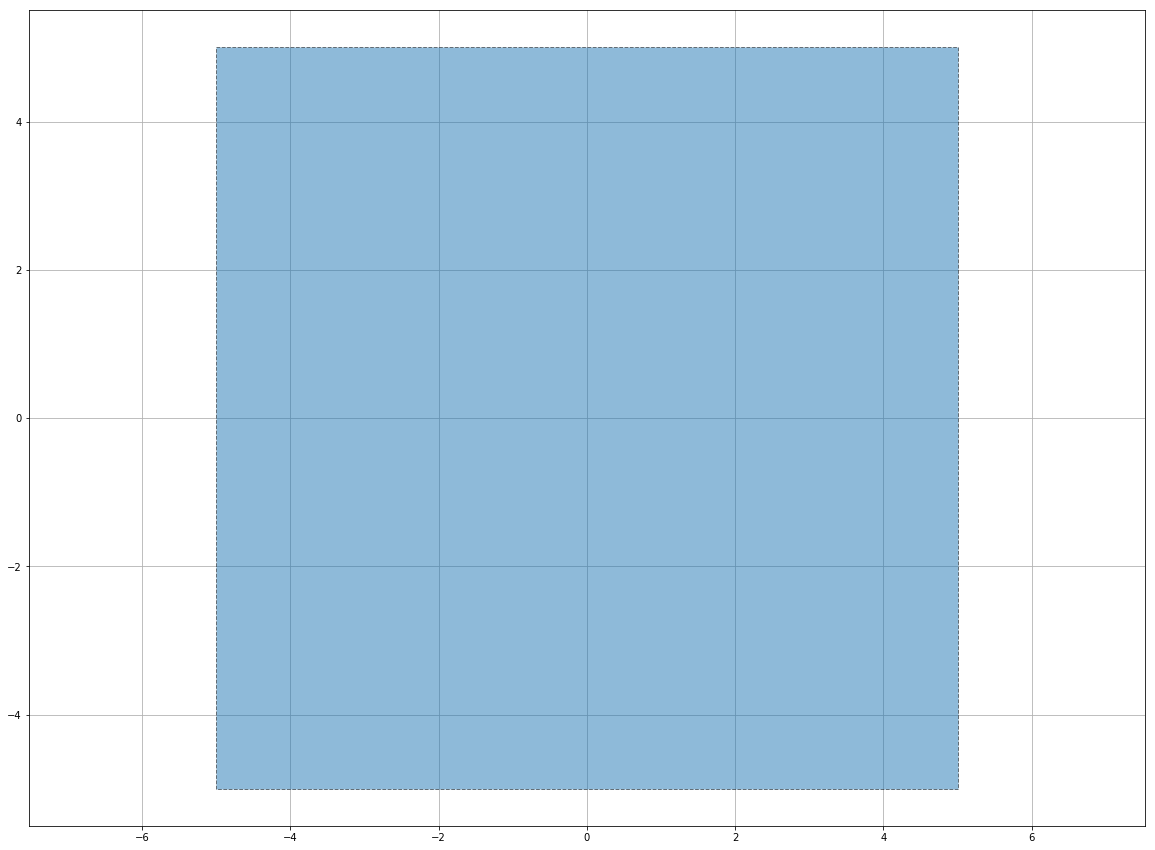

In [7]:
print(world_gen.constraints.tags)
plot_workspace(workspace=world_gen.constraints.get(workspace_name1))

In [8]:
world_gen.world.add_model(
    tag='ground_plane',
    model=SimulationModel.from_gazebo_model('ground_plane')
)

'ground_plane'

In [9]:
from pcg_gazebo.generators import WorldGenerator

gen2 = WorldGenerator(name='two')
gen2.constraints.tags

['my_workspace', 'tangent_to_ground_plane']

### engines:

https://github.com/boschresearch/pcg_gazebo/tree/a2d698559495e7ec592ee8cd149a91556fc2dba0/pcg_gazebo/generators/engines

In [10]:
NUM_BOXES = 1
NUM_CYLINDER = 1

placement_policy = dict(
    models=[box_tag, cylinder_tag],
    config=[
        dict(
            dofs=['x', 'y'],            
            tag='workspace',
            workspace=workspace_name1
        ),
        dict(
            dofs=['yaw'],            
            tag='uniform',                            
            min=-3.141592653589793,
            max=3.141592653589793               
        )
    ]
)

world_gen.add_engine(
    tag='box_placement',
    engine_name='random_pose',
    models=[box_tag, cylinder_tag],
    max_num=dict(
        tameshi_box=NUM_BOXES,
        tameshi_cylinder=NUM_CYLINDER
    ),
    model_picker='random',
    no_collision=True,
    policies=[placement_policy],
    constraints=[
        dict(
            model=box_tag,
            constraint=constraint_name_t2g
        ),
        dict(
            model=cylinder_tag,
            constraint=constraint_name_t2g
        )
    ]
)

True

In [11]:
world_gen.engines.tags

['box_placement']

In [12]:
world_gen.run_engines()

True

In [13]:
world_gen.world.models[box_tag].pose.position

array([2.86718398, 0.74578383, 0.2       ])

In [14]:
world_gen.world.create_scene().show()

/usr/local/lib/python2.7/dist-packages/trimesh/visual/color.py:712: RuntimeWarning: invalid value encountered in divide
  (-1, 1))).astype(dtype)


Figure(393.701x393.701)


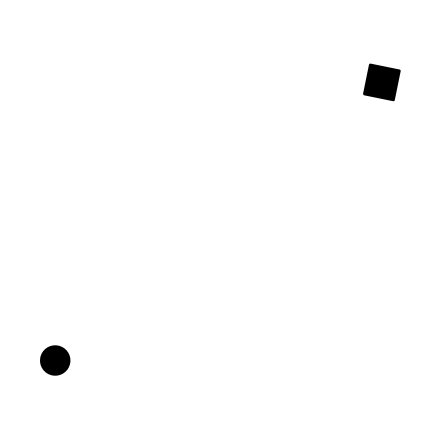

In [15]:
import matplotlib.pyplot as plt
fig = plot_occupancy_grid(
    world_gen.world.models, 
    with_ground_plane=False, 
    static_models_only=False, 
    ground_plane_models=['box_floor']
)
print(fig)
plt.show()

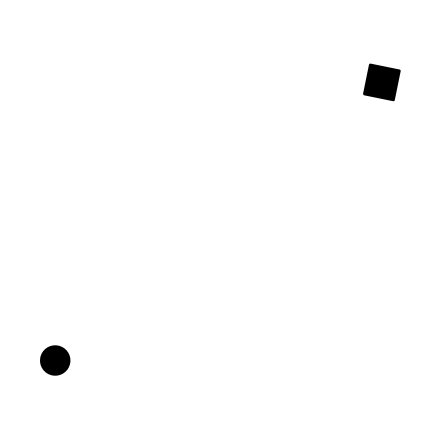

In [16]:
## dynamic model will be created when writing 'mass = ***' in config

fig = plot_occupancy_grid(
    world_gen.world.models,
    with_ground_plane=False,
    static_models_only=True,
    ground_plane_models=['box_floor'])
plt.show()

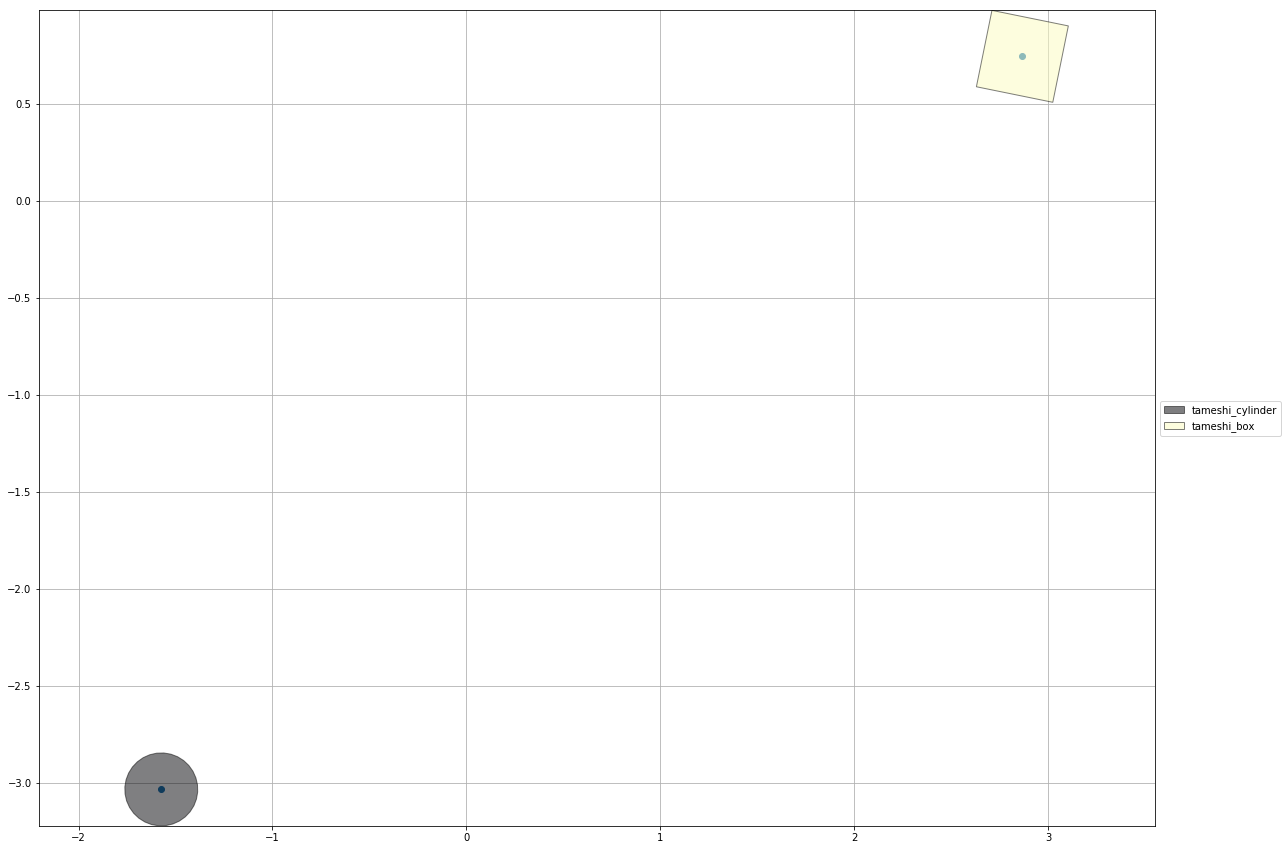

In [17]:
fig = world_gen.world.plot_footprints(engine='matplotlib')

## Generating raodom polygon wall

[(0.06638074204061617, -4.080273220360961),
 (-4.651674281838524, -4.789572692210125),
 (-4.787916216676491, 3.3570499909228264),
 (-0.38233894464443985, 2.8378586414646065),
 (3.324308550576383, 2.0685444511503572),
 (4.200092151020565, 0.6495722870872136),
 (4.551964940433821, -1.0336081782403026),
 (0.06638074204061617, -4.080273220360961)]


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2b48ed4550>)

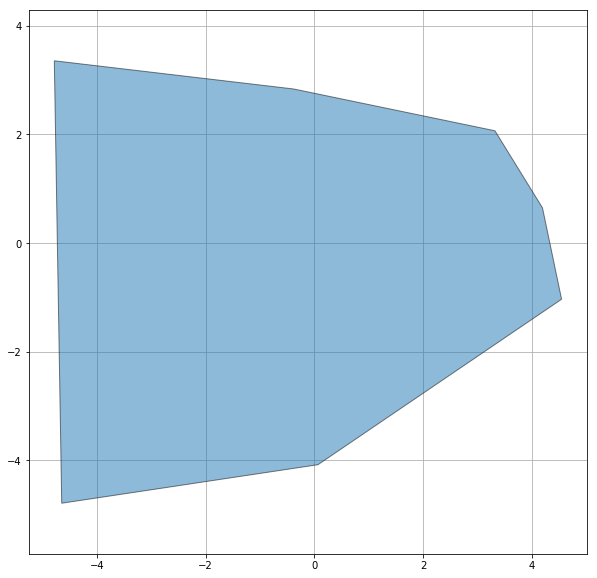

In [18]:
from pcg_gazebo.generators.shapes import random_points_to_triangulation
from pcg_gazebo.visualization import plot_shapely_geometry, plot_mesh
from pcg_gazebo.generators.creators import create_models_from_config


wall_polygon = random_points_to_triangulation(n_points=10,x_max=5, x_min=-5, y_max=5, y_min=-5)
__import__('pprint').pprint(list(wall_polygon.exterior.coords))

plot_shapely_geometry(wall_polygon, fig_height=10, fig_width=10)

In [19]:
wall_thickness = 0.15
wall_height = 2

walls_model = create_models_from_config([
    dict(
        type='extrude',
        args=dict(
            polygon=wall_polygon,
            height=wall_height,
            thickness=wall_thickness,
            extrude_boundaries=True,
            name='my_wall',
            color='xkhd'
        )
    )
])[0]

print(walls_model.pose.position)

[0 0 0]


In [20]:
world_gen.init()
world_gen.engines.reset()

world_gen.world.add_model(tag=walls_model.name, model=walls_model)
world_gen.world.add_model(tag='ground_plane', model=SimulationModel.from_gazebo_model('ground_plane'))

'ground_plane'

Position (x, y, z) [m]: -0.117968449661, -0.716182103049, 1.0
	 - x: -0.117968449661
	 - y: -0.716182103049
	 - z: 1.0
Orientation rpy (roll, pitch, yaw) (degrees): 
	 - Roll: 0.0
	 - Pitch: -0.0
	 - Yaw: 0.0



(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2b517d1190>)

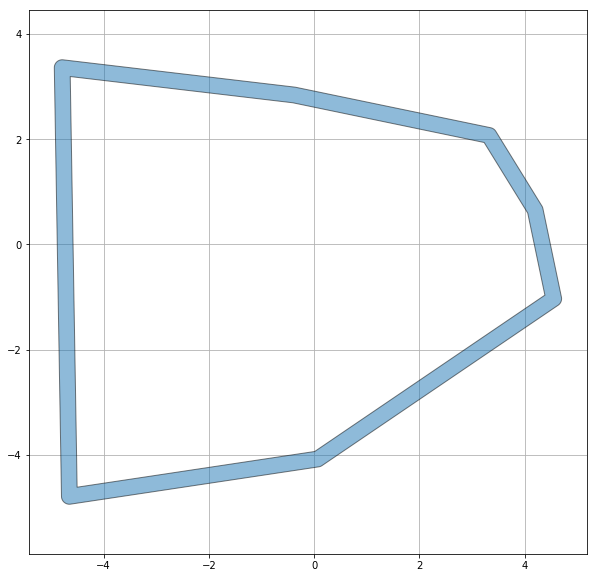

In [21]:
col = world_gen.world.get_model(tag=walls_model.name).get_link_by_name('my_wall').collisions[0]
offset = __import__('copy').deepcopy(col.pose)
offset.position = [-1*p for p in col.pose.position]
print(offset)

mesh = world_gen.world.get_model(tag=walls_model.name).get_meshes(pose_offset=offset)[0]
import trimesh
poly = trimesh.path.polygons.projected(mesh, (0,0,1))
plot_shapely_geometry(poly, fig_height=10, fig_width=10)

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2b48f8ed50>)

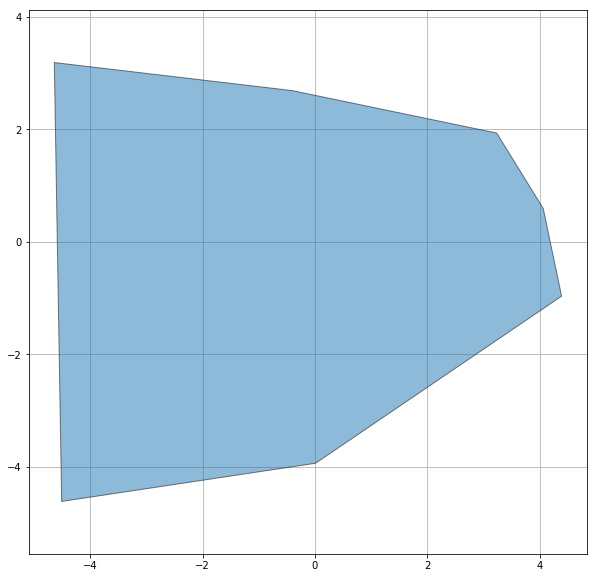

In [22]:
from shapely.geometry import Polygon

plot_shapely_geometry(Polygon(poly.interiors[0]), fig_width=10, fig_height=10)

In [23]:
world_gen.world.models

{'ground_plane': <pcg_gazebo.simulation.model.SimulationModel at 0x7f2b5141bfd0>,
 'my_wall': <pcg_gazebo.simulation.model.SimulationModel at 0x7f2b529c3c90>}

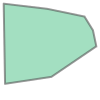

In [24]:
free_space_polygon = world_gen.world.get_free_space_polygon(
    ground_plane_models=[walls_model.name],
    ignore_models=['ground_plane'])
free_space_polygon

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2b5144e5d0>)

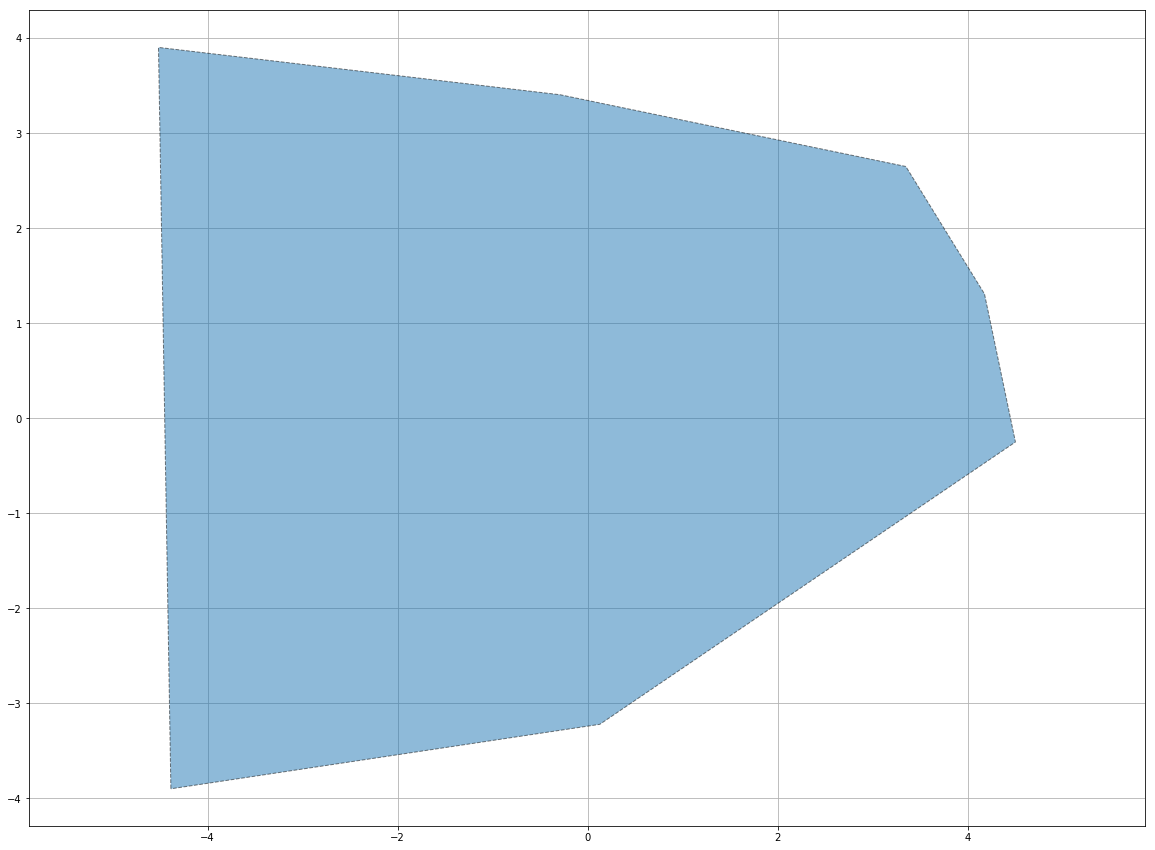

In [25]:
# Add the workspace constraint to the generator
world_gen.add_constraint(
    name='room_workspace',
    type='workspace',
    frame='world',
    geometry_type='polygon',
    polygon=free_space_polygon
)

plot_workspace(world_gen.constraints.get('room_workspace'), fig_height=10, fig_width=10)

In [26]:
NUM_BOXES = 4
NUM_CYLINDER = 4

placement_policy = dict(
    models=[box_tag, cylinder_tag],
    config=[
        dict(
            dofs=['x', 'y'],            
            tag='workspace',
            workspace="room_workspace"
        ),
        dict(
            dofs=['yaw'],            
            tag='uniform',                            
            min=-3.141592653589793,
            max=3.141592653589793               
        )
    ]
)

world_gen.add_engine(
    tag='box_placement',
    engine_name='random_pose',
    models=[box_tag, cylinder_tag],
    max_num=dict(
        tameshi_box=NUM_BOXES,
        tameshi_cylinder=NUM_CYLINDER
    ),
    model_picker='random',
    no_collision=True,
    policies=[placement_policy],
    constraints=[
        dict(
            model=box_tag,
            constraint=constraint_name_t2g
        ),
        dict(
            model=cylinder_tag,
            constraint=constraint_name_t2g
        )
    ]
)

True

In [27]:
world_gen.run_engines(attach_models=True)

True

In [28]:
world_gen.world.models

{'ground_plane': <pcg_gazebo.simulation.model.SimulationModel at 0x7f2b48358390>,
 'my_wall': <pcg_gazebo.simulation.model.SimulationModel at 0x7f2b483023d0>,
 'tameshi_box': <pcg_gazebo.simulation.model.SimulationModel at 0x7f2b48358990>,
 'tameshi_box_1': <pcg_gazebo.simulation.model.SimulationModel at 0x7f2b48358150>,
 'tameshi_box_2': <pcg_gazebo.simulation.model.SimulationModel at 0x7f2b483a8290>,
 'tameshi_box_3': <pcg_gazebo.simulation.model.SimulationModel at 0x7f2b5296e490>,
 'tameshi_cylinder': <pcg_gazebo.simulation.model.SimulationModel at 0x7f2b483a8250>,
 'tameshi_cylinder_1': <pcg_gazebo.simulation.model.SimulationModel at 0x7f2b482d7e50>,
 'tameshi_cylinder_2': <pcg_gazebo.simulation.model.SimulationModel at 0x7f2b4824ff10>,
 'tameshi_cylinder_3': <pcg_gazebo.simulation.model.SimulationModel at 0x7f2b483a8810>}

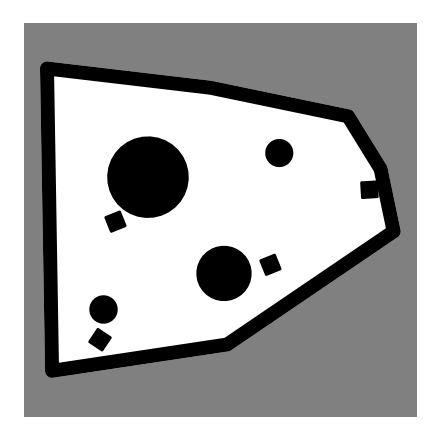

In [29]:
fig = plot_occupancy_grid(
    world_gen.world.models,
    with_ground_plane=True,
    static_models_only=False,
    exclude_contains=['ground_plane'],
    ground_plane_models=[walls_model.name]
)

(17607,)
(393, 393)


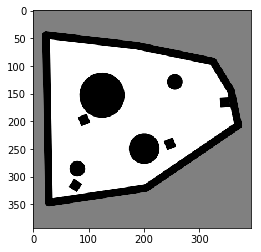

In [30]:
import io
import cv2
import numpy as np

buf = io.BytesIO()
fig.savefig(buf, format='png')
enc = np.frombuffer(buf.getvalue(), dtype=np.uint8)
print(enc.shape)
dst = cv2.imdecode(enc, cv2.IMREAD_GRAYSCALE)
# dst = cv2.imdecode(enc, 1)
print(dst.shape)

plt.imshow(dst, cmap='gray')

In [45]:
from pcg_gazebo.generators.occupancy import generate_occupancy_grid
import time

start = time.time()

grid = generate_occupancy_grid(
    world_gen.world.models,
    ground_plane_models=[walls_model.name]
)

ela = time.time() - start
print(grid)
print('time:', ela)

{'non_static': {}, 'static': {'ground_plane_models': <shapely.geometry.polygon.Polygon object at 0x7f2be2610050>, 'ground_plane': <shapely.geometry.polygon.Polygon object at 0x7f2be2748350>, 'tameshi_box_1': <shapely.geometry.polygon.Polygon object at 0x7f2be2651f90>, 'tameshi_box_3': <shapely.geometry.polygon.Polygon object at 0x7f2be2651f50>, 'tameshi_box_2': <shapely.geometry.polygon.Polygon object at 0x7f2be2651fd0>, 'tameshi_cylinder': <shapely.geometry.polygon.Polygon object at 0x7f2be25f9090>, 'tameshi_box': <shapely.geometry.polygon.Polygon object at 0x7f2be2658e10>, 'tameshi_cylinder_3': <shapely.geometry.polygon.Polygon object at 0x7f2be25f90d0>, 'tameshi_cylinder_2': <shapely.geometry.polygon.Polygon object at 0x7f2be25f9050>, 'tameshi_cylinder_1': <shapely.geometry.polygon.Polygon object at 0x7f2be25f9110>}, 'ground_plane': <shapely.geometry.polygon.Polygon object at 0x7f2be25f9f90>}
('time:', 1.8666801452636719)


[<shapely.geometry.polygon.Polygon object at 0x7f2be2651f90>, <shapely.geometry.polygon.Polygon object at 0x7f2be2651f50>, <shapely.geometry.polygon.Polygon object at 0x7f2be2651fd0>, <shapely.geometry.polygon.Polygon object at 0x7f2be25f9090>, <shapely.geometry.polygon.Polygon object at 0x7f2be2658e10>, <shapely.geometry.polygon.Polygon object at 0x7f2be25f90d0>, <shapely.geometry.polygon.Polygon object at 0x7f2be25f9050>, <shapely.geometry.polygon.Polygon object at 0x7f2be25f9110>]


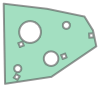

In [50]:
from shapely.geometry import Polygon

space = Polygon(grid['static']['ground_plane_models'].interiors[0])

ex = ['ground_plane', 'ground_plane_models']
interior_poly = [grid['static'][name] for name in grid['static'].keys() if not name in ex]
print(interior_poly)
Polygon(
    list(space.exterior.coords),
    [list(p.exterior.coords) for p in interior_poly]
)

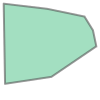

In [49]:
world_gen.world.get_free_space_polygon(ground_plane_models=[walls_model.name], ignore_models=['ground_plane'])